In [76]:
import pandas as pd
import numpy as np

import pickle
import sys
sys.path.append('../src') # Adjust this path as needed
from metrics import pearson_corr, compute_psd
from vis import plot_eeg, plot_psd_comparison, plot_psd_multiple_channels

In [77]:
EEG_BCI_SR = 160 # Hz

In [78]:
with open('../data/eeg_datasets.pkl', 'rb') as f:
    eeg_datasets_dict = pickle.load(f)

original_datasets = eeg_datasets_dict['datasets']

In [79]:
with open('../data/denoised_data.pkl', 'rb') as f:
    denoised_data_dict = pickle.load(f)

results_wt_orig = denoised_data_dict['results_wavelet_denoising_original']
results_ica_orig = denoised_data_dict['results_ica_original']

# WT

In [80]:
for dataset_results in results_wt_orig:
    original_dataset = next((d for d in original_datasets if d['name'] == dataset_results['dataset_name']), None)

    metrics_results = pd.DataFrame(columns=['wavelet_type', 'level', 'threshold_mode', 'psd_pearson_correlation'])

    signal_original = original_dataset['data']
    parameter_sets = dataset_results['parameter_sets']
    denoised_signals = dataset_results['denoised_signals']

    for parameter_set, denoised in zip(parameter_sets, denoised_signals):
        _, psd_orig = compute_psd(np.array(signal_original), EEG_BCI_SR)
        _, psd_denoised = compute_psd(np.array(denoised), EEG_BCI_SR)
        pearson_psd = np.mean([
                pearson_corr(psd_orig[ch], psd_denoised[ch])
                for ch in range(psd_orig.shape[0])
                                ])
        metrics_results.loc[len(metrics_results)] = [parameter_set['wavelet_type'], parameter_set['level'], parameter_set['threshold_mode'], pearson_psd]

In [81]:
metrics_results.sort_values(by=['psd_pearson_correlation'], ascending=False).head(10)
# metrics_results.sort_values(by=['psd_pearson_correlation'], ascending=True).head(10)
# metrics_results.head(5)

,wavelet_type,level,threshold_mode,psd_pearson_correlation
5,db8,3,hard,0.995863
7,sym8,3,hard,0.995859
1,coif4,3,hard,0.995841
0,coif4,3,soft,0.995734
4,db8,3,soft,0.995725
6,sym8,3,soft,0.995710
3,coif8,3,hard,0.995563
2,coif8,3,soft,0.995398


In [82]:
SIG_IND = 5

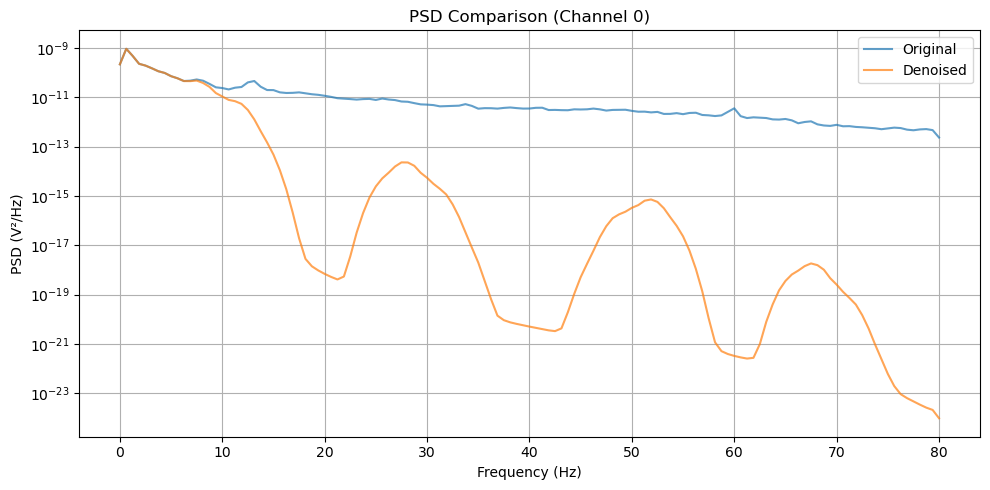

In [83]:
sig = original_datasets[0]['data']
den = results_wt_orig[0]['denoised_signals'][SIG_IND]

sig.shape, den.shape

f, psd_orig = compute_psd(sig, EEG_BCI_SR)
_, psd_denoised = compute_psd(den, EEG_BCI_SR)

# Plot for channel 0 (e.g., Fz)
plot_psd_comparison(f, psd_orig, psd_denoised, channel_idx=0)

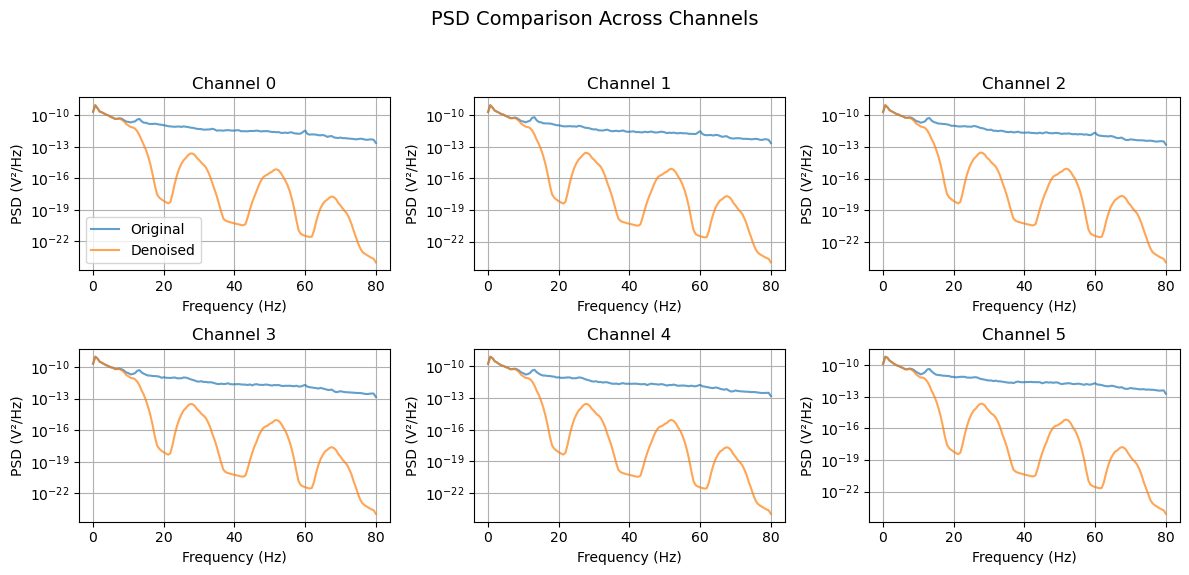

In [84]:
# Plot PSDs for channels 0 to 5
plot_psd_multiple_channels(f, psd_orig, psd_denoised, channel_idxs=[0, 1, 2, 3, 4, 5])

In [85]:
denoised_wt_df = pd.DataFrame(den.T, columns=original_datasets[0]["ch_names"])
original_df = pd.DataFrame(sig.T, columns=original_datasets[0]["ch_names"])

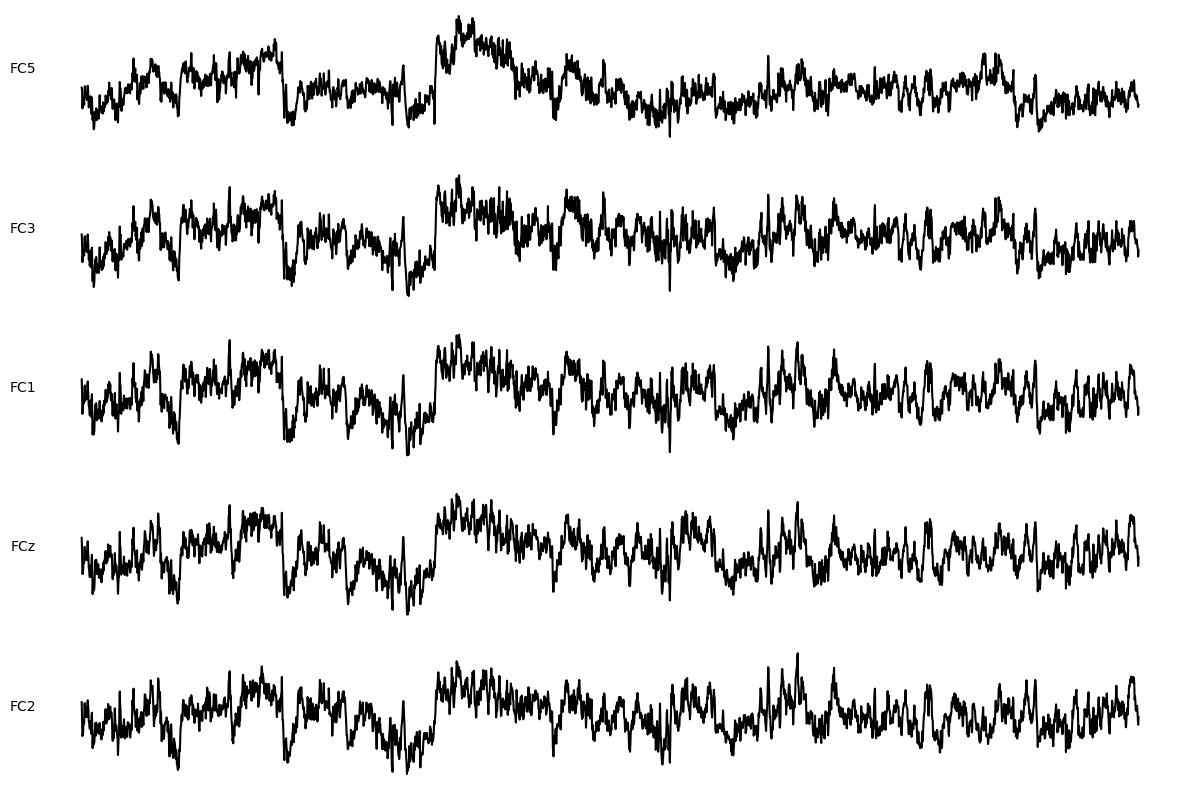

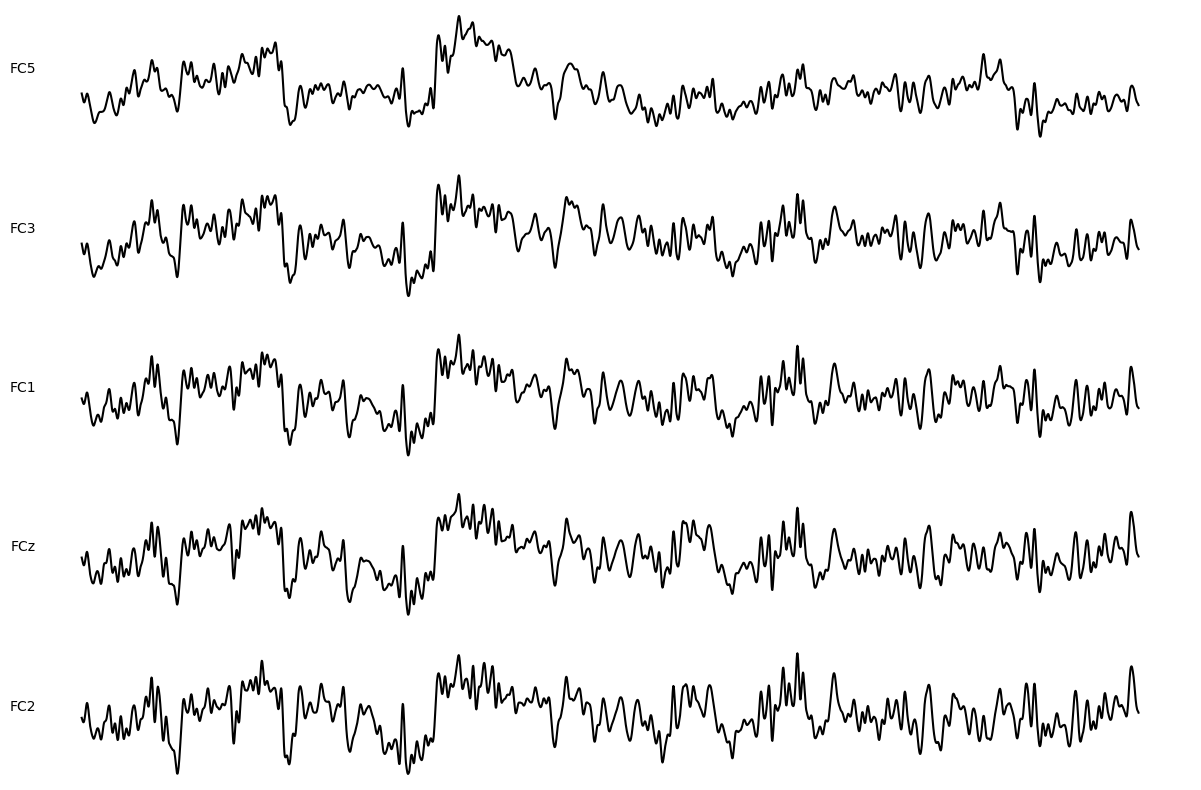

In [86]:
plot_times = range(0,3000)
plot_eeg(original_df.iloc[plot_times,:], 5)
plot_eeg(denoised_wt_df.iloc[plot_times,:], 5)

# ICA

In [87]:
for dataset_results in results_ica_orig:
    original_dataset = next((d for d in original_datasets if d['name'] == dataset_results['dataset_name']), None)

    metrics_results = pd.DataFrame(columns=['n_components', 'psd_pearson_correlation'])

    signal_original = original_dataset['data']
    parameter_sets = dataset_results['parameter_sets']
    denoised_signals = dataset_results['denoised_signals']

    for parameter_set, denoised in zip(parameter_sets, denoised_signals):
        _, psd_orig = compute_psd(np.array(signal_original), EEG_BCI_SR)
        _, psd_denoised = compute_psd(np.array(denoised), EEG_BCI_SR)
        pearson_psd = np.mean([
                pearson_corr(psd_orig[ch], psd_denoised[ch])
                for ch in range(psd_orig.shape[0])
                                ])
        metrics_results.loc[len(metrics_results)] = [parameter_set['n_components'], pearson_psd]

In [88]:
metrics_results.sort_values(by=['psd_pearson_correlation'], ascending=False).head(10)

,n_components,psd_pearson_correlation
5,15.0,0.999606
4,5.0,0.998181
3,4.0,0.997538
2,3.0,0.996972
1,2.0,0.995050
0,1.0,0.988788


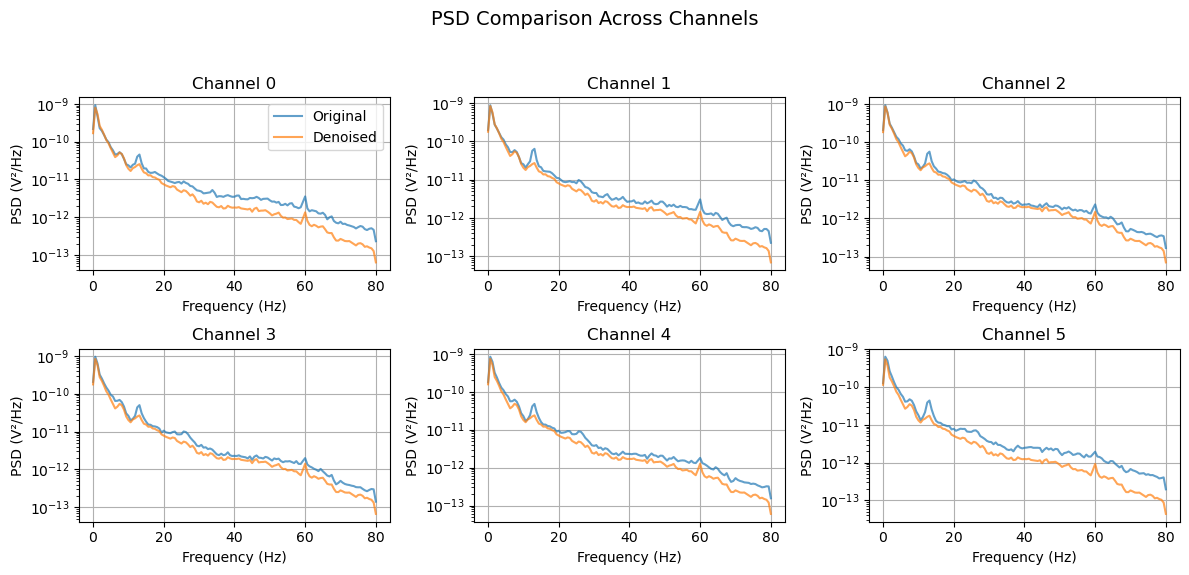

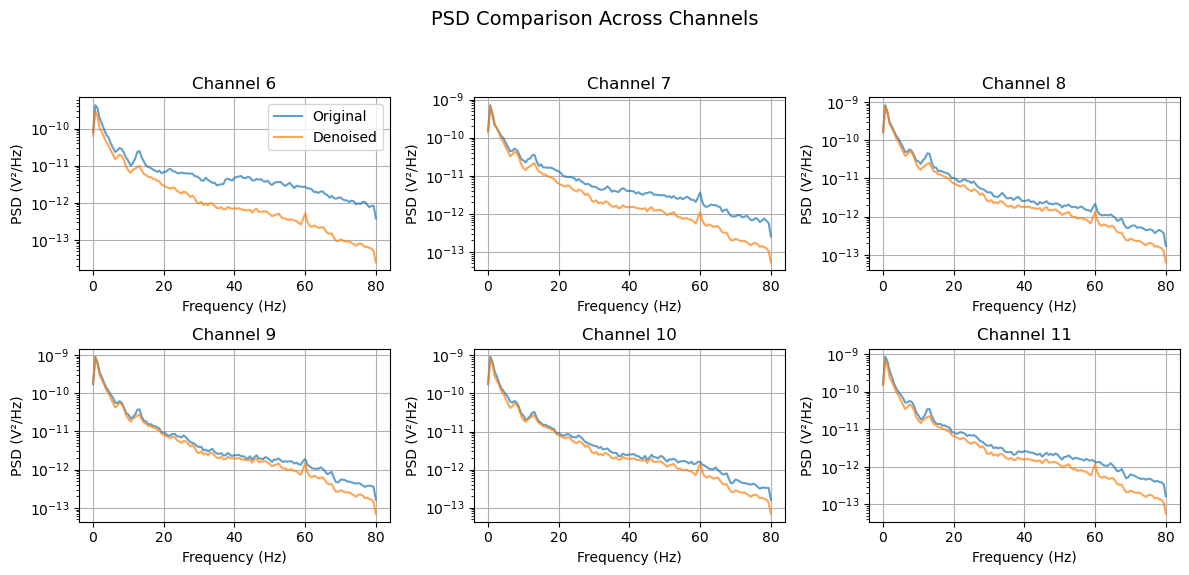

In [95]:
sig = original_datasets[0]['data']
den = results_ica_orig[0]['denoised_signals'][0]

f, psd_orig = compute_psd(sig, EEG_BCI_SR)
_, psd_denoised = compute_psd(den, EEG_BCI_SR)

plot_psd_multiple_channels(f, psd_orig, psd_denoised, channel_idxs=[0, 1, 2, 3, 4, 5])
plot_psd_multiple_channels(f, psd_orig, psd_denoised, channel_idxs=[i for i in range(6,12)])

In [90]:
denoised_wt_df = pd.DataFrame(den.T, columns=original_datasets[0]["ch_names"])

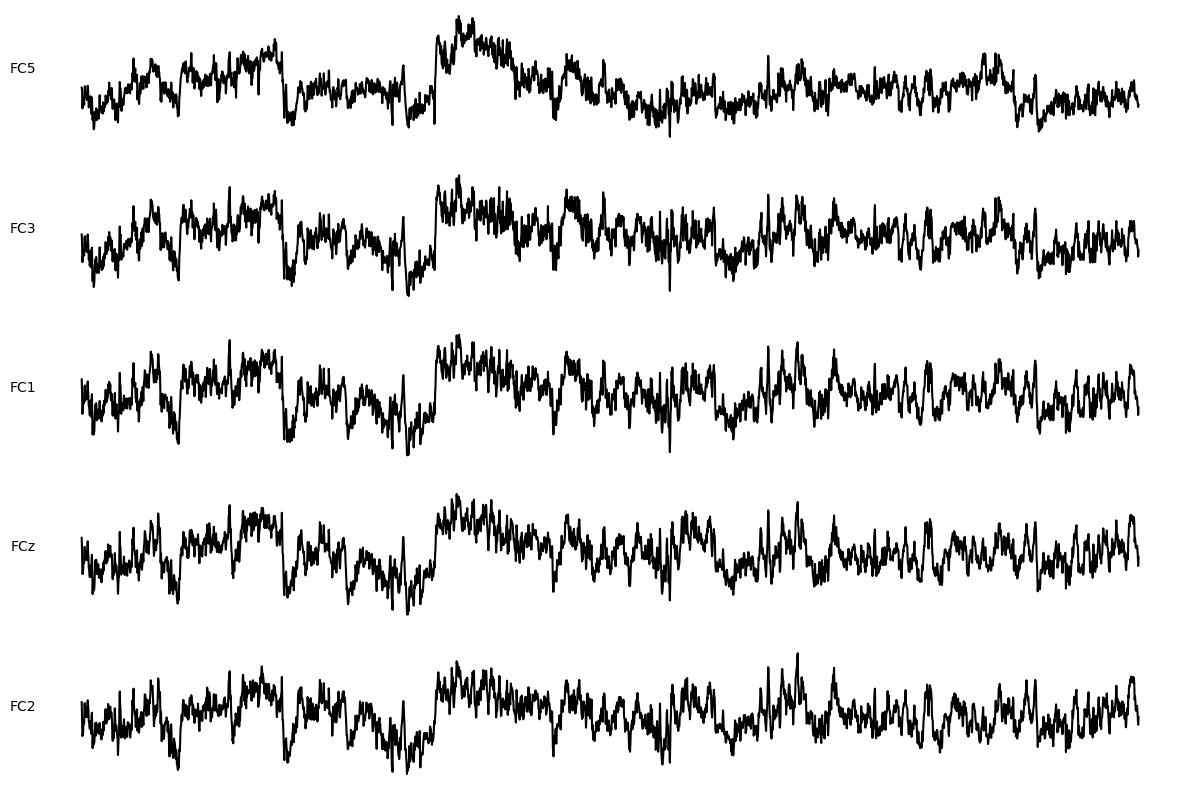

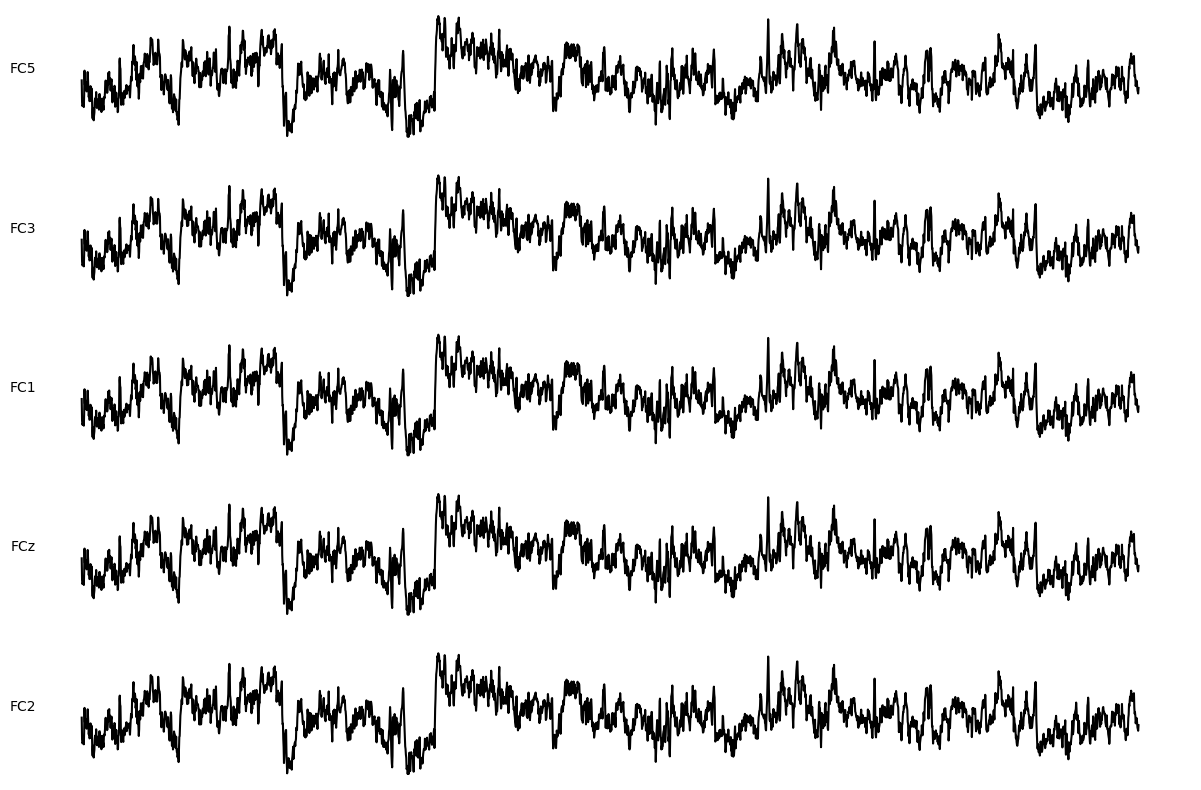

In [91]:
plot_times = range(0,3000)
plot_eeg(original_df.iloc[plot_times,:], 5)
plot_eeg(denoised_wt_df.iloc[plot_times,:], 5)